# LAB 3
# DSP
## Steven Rodríguez Mendez
## 1045506121

### ----------------------------------------------------------------------------------------------------------------------------------------------------------------

## 1. Análisis de series de tiempo
#### 1.1 Análisis de señales ecónomicas


In [15]:
import numpy as np
import matplotlib.pyplot as plt #libreria usada para graficas
import pandas as pd #libreria para el manejo de datos
from scipy.io.wavfile import read # libreria para lectura de archivos de audio
from IPython.display import Audio # para escuchar la senal
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
from sklearn import linear_model
from scipy.signal import dimpulse
import math
#para que la grfica se inscriste en e notbook
%matplotlib inline

In [16]:
data = np.loadtxt('data_precipitacion.txt') # Cargamos el archivo
print (data)

[[  1.00000000e+00   1.97800000e+03   1.95900000e+01]
 [  2.00000000e+00   1.97800000e+03   1.74600000e+01]
 [  3.00000000e+00   1.97800000e+03   1.53200000e+01]
 ..., 
 [  3.63000000e+02   2.01100000e+03   1.17100000e+01]
 [  3.64000000e+02   2.01100000e+03   2.97000000e+00]
 [  3.65000000e+02   2.01100000e+03   1.03900000e+01]]


#### 1.3. Análisis de la serie de tiempo
##### 1. Cual es el periodo de muestreo para esta señal? Expreselo en días y años.

In [17]:
sample_number = len (data)
print (sample_number)
years = sample_number/365
print (years)

12410
34.0


Viendo los datos podemos saber que la cantidad de muestras que se tomaron durante los 34 años fueron 12410, además, podemos deducir que se tomaron los datos día a día desde el primero de enero de 1992 hasta agosto 31 de 2016. Con eso datos podemos concluir que el periodo de muestra por día es 1 y el periodo de muestra en años es 1/365. 

##### 2. Extraiga cada una de las columnas descritas anteriormente a un vector.

In [18]:
#para hacer el for para el vector
num_rows = sample_number            

days = np.zeros(num_rows)
years = np.zeros(num_rows)
precipitation = np.zeros(num_rows)

#creando el vector  de cada columna
for i in range (0, num_rows, 1):     
    days[i] = data[i,0]
    years[i] = data[i,1]
    precipitation[i] = data[i,2]
    
#mostramos los vectores    
print (days)        
print (years)
print (precipitation)

[   1.    2.    3. ...,  363.  364.  365.]
[ 1978.  1978.  1978. ...,  2011.  2011.  2011.]
[ 19.59  17.46  15.32 ...,  11.71   2.97  10.39]


##### 3. Grafíque la serie de tiempo contra el tiempo y presente un análisis sobre la misma.

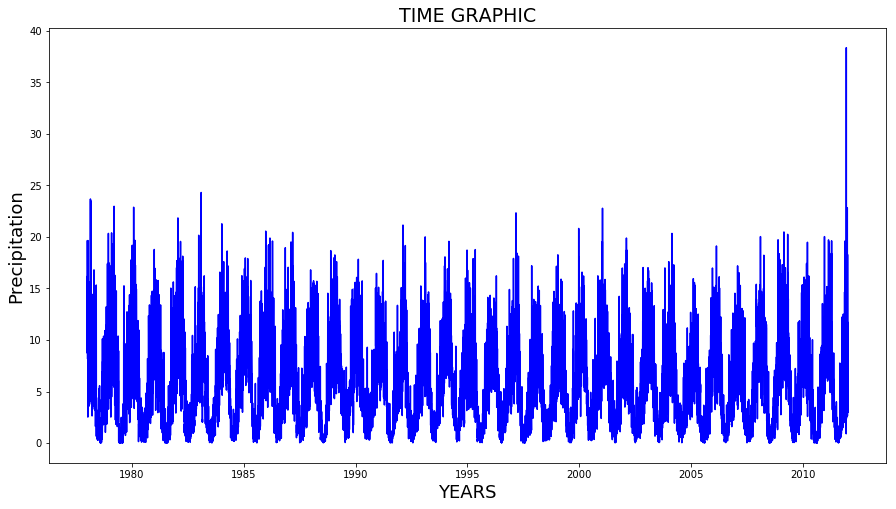

In [19]:
#periodo de mmuestreo de la señal
Ts = 1/365  
# para la senal de precipitacion, vector de tiempo
t=np.arange(1978, 2012, Ts) 

#graficamos la señal durante todos los años
plt.figure(figsize=(15,8))
plt.plot(t, precipitation, 'b')
plt.xlabel('YEARS',fontsize=18)
plt.ylabel('Precipitation',fontsize=18)
plt.title('TIME GRAPHIC', fontsize=19)
plt.show()

Viendo la gráfica no se puede sacar buenas conclusiones, porque prácticamente se ve precipitación durante todo el año, solo se nota que baja un poco a finales y principios de cada año.

##### 4. Realice un histograma de la señal previa, y analice el resultado de la gráfica. (Utilice la función plt.hist(senal,50))

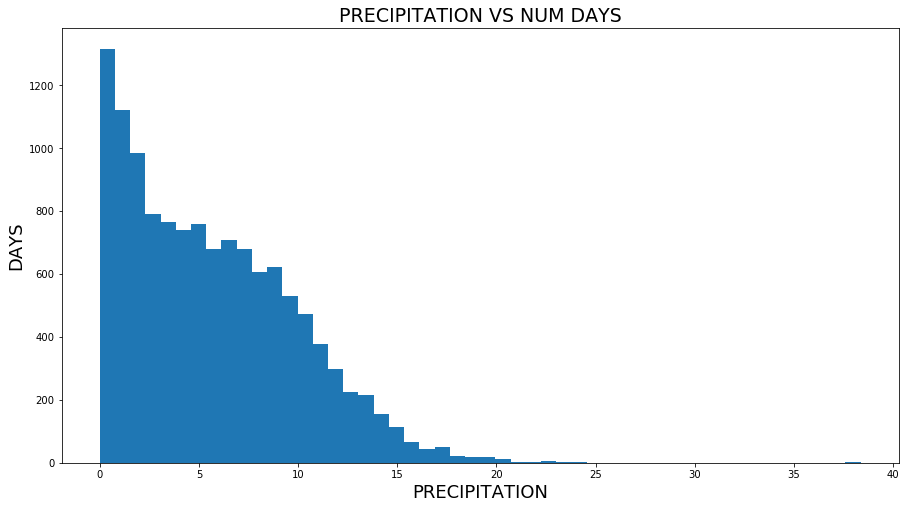

In [20]:
plt.figure(figsize=(15,8))
plt.hist(precipitation, 50)
plt.xlabel('PRECIPITATION',fontsize=18)
plt.ylabel('DAYS',fontsize=18)
plt.title('PRECIPITATION VS NUM DAYS', fontsize=19)
plt.show()

La grafica anterior hace una comparación respecto a la cantidad de días que en las cuales hubo una cantidad de precipitación, es decir, de los 34 años de muestreo 1200 días la precipitación fue prácticamente cero, durante 750 días aproximadamente la precipitación fue de 5, las precipitaciones de 20 fueron muy pocos los días que se dieron. Se puede concluir que la precipitación en esa zona es baja ya que son pocos los días en las que se da.

##### 5. Indique la fecha de expedición de su cédula y el valor de la serie de tiempo ese día.

In [21]:
precip=precipitation[np.where((years==2008)  & (days==14))] # para la precipi
print ("LA cantidad de pricipitación en el años 2008, día 14 fue:", precip)

LA cantidad de pricipitación en el años 2008, día 14 fue: [ 6.3]


##### 6. Si tiene la señal de precipitación en el amazonas, extraiga, gráque y analice brevemente el comportamiento de la lluvia en el amazonas en el año en que usted nació.

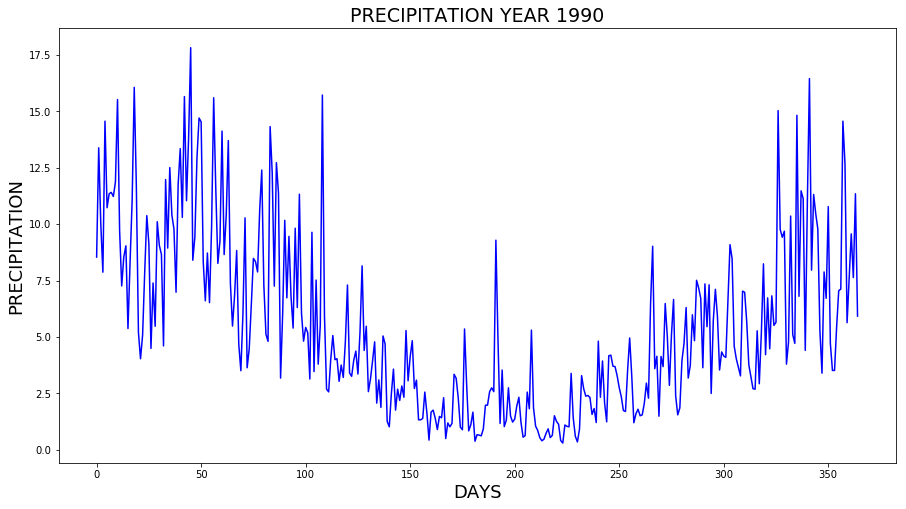

In [22]:
t = np.arange(0,365,1)
lluvia1990=precipitation[np.where(years==1990 )]
plt.figure(figsize=(15,8))
plt.plot(t, lluvia1990, 'b')
plt.xlabel('DAYS',fontsize=18)
plt.ylabel('PRECIPITATION',fontsize=18)
plt.title('PRECIPITATION YEAR 1990', fontsize=19)
plt.show()

Se ve una precipitación bastante alta en los meses de enero, febrero, marzo y parte de abril. La precipitación baja entre mayo y finales de agosto, teniendo ente esos años un pico junio. a medida que pasan los meses después de agosto la precipitación tiene un acenso hasta llegar a una precipitación bastante alta en diciembre. 

## 2. Filtro de media móvil
### 2.1. Procedimiento

Graficamos la señal de todos los años para comparar los filtros


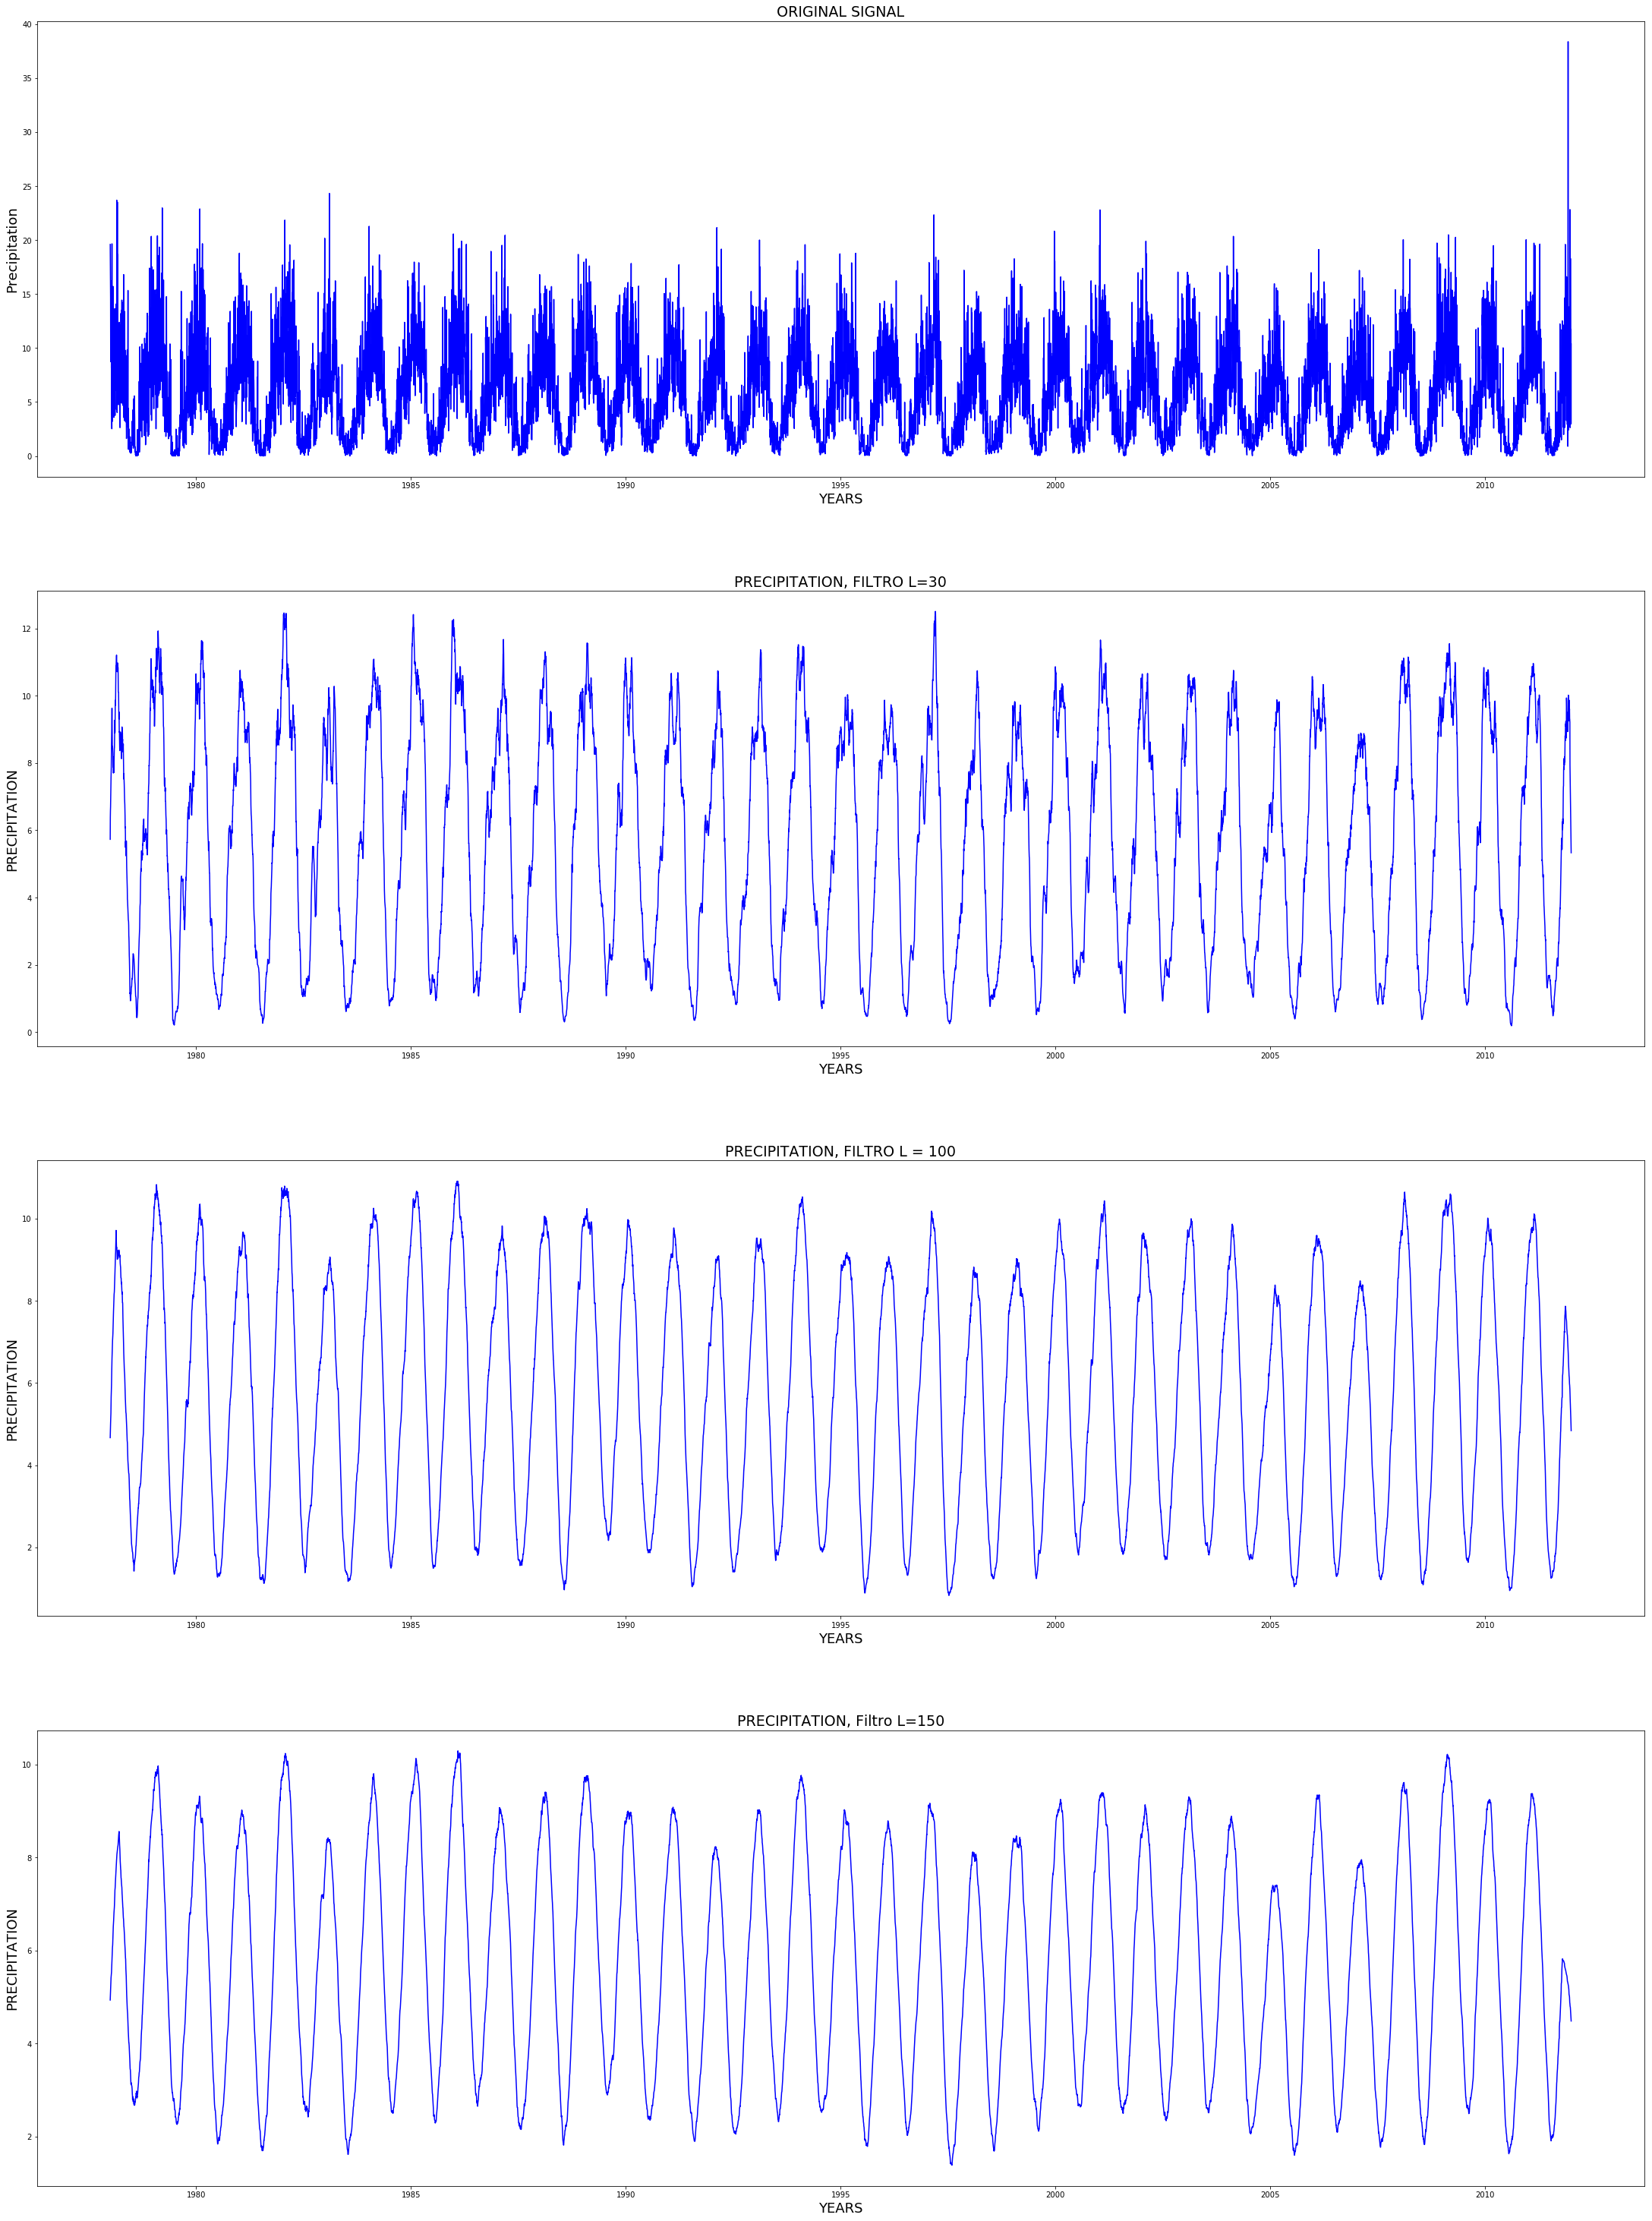

In [23]:
#creamos los filtros para la señal completa

#valores de filtros
L = 30
L_100 = 100
L_150 = 150


#Generamos los coeficientres del filtro
coefs=np.ones(L)/float(L)
coefs_100=np.ones(L_100)/float(L_100)
coefs_150=np.ones(L_150)/float(L_150)


#salida de convolución L=30, L=100, L=150
senal_smooth=np.convolve(precipitation, coefs, mode='same')
senal_smooth_100=np.convolve(precipitation, coefs_100, mode='same')
senal_smooth_150=np.convolve(precipitation, coefs_150, mode='same')


#Para representar el denominador, el numerador y la respuesta natural
num=np.zeros(L)
num[0]=1.0/L
num[-1]=-1.0/L
den=np.zeros(L)
den[0]=1
den[1]=-1


#periodo de muestreo de la señal
Ts = 1/365  
#para la senal de precipitacion, vector de tiempo
t=np.arange(1978, 2012, Ts) 


print ("Graficamos la señal de todos los años para comparar los filtros")


#Graficamos

#señal original
plt.subplot(4,1,1)
plt.plot(t, precipitation, 'b')
plt.xlabel('YEARS',fontsize=18)
plt.ylabel('Precipitation',fontsize=18)
plt.title('ORIGINAL SIGNAL', fontsize=19)


#graficamos L = 30
plt.subplot(4,1,2)
plt.plot(t, senal_smooth, 'b')
plt.xlabel('YEARS',fontsize=18)
plt.ylabel('PRECIPITATION',fontsize=18)
plt.title('PRECIPITATION, FILTRO L=30', fontsize=19)


#graficamos L = 100
plt.subplot(4,1,3)
plt.plot(t, senal_smooth_100, 'b')
plt.xlabel('YEARS',fontsize=18)
plt.ylabel('PRECIPITATION',fontsize=18)
plt.title('PRECIPITATION, FILTRO L = 100', fontsize=19)

#graficamos L = 150
plt.subplot(4,1,4)
plt.plot(t, senal_smooth_150, 'b')
plt.xlabel('YEARS',fontsize=18)
plt.ylabel('PRECIPITATION',fontsize=18)
plt.title('PRECIPITATION, Filtro L=150', fontsize=19)


plt.subplots_adjust(top=10, bottom=0.1, left=0.10, right=5, hspace=0.25, wspace=0.35)


Graficamos la señal del año 1990 para comparar los filtros


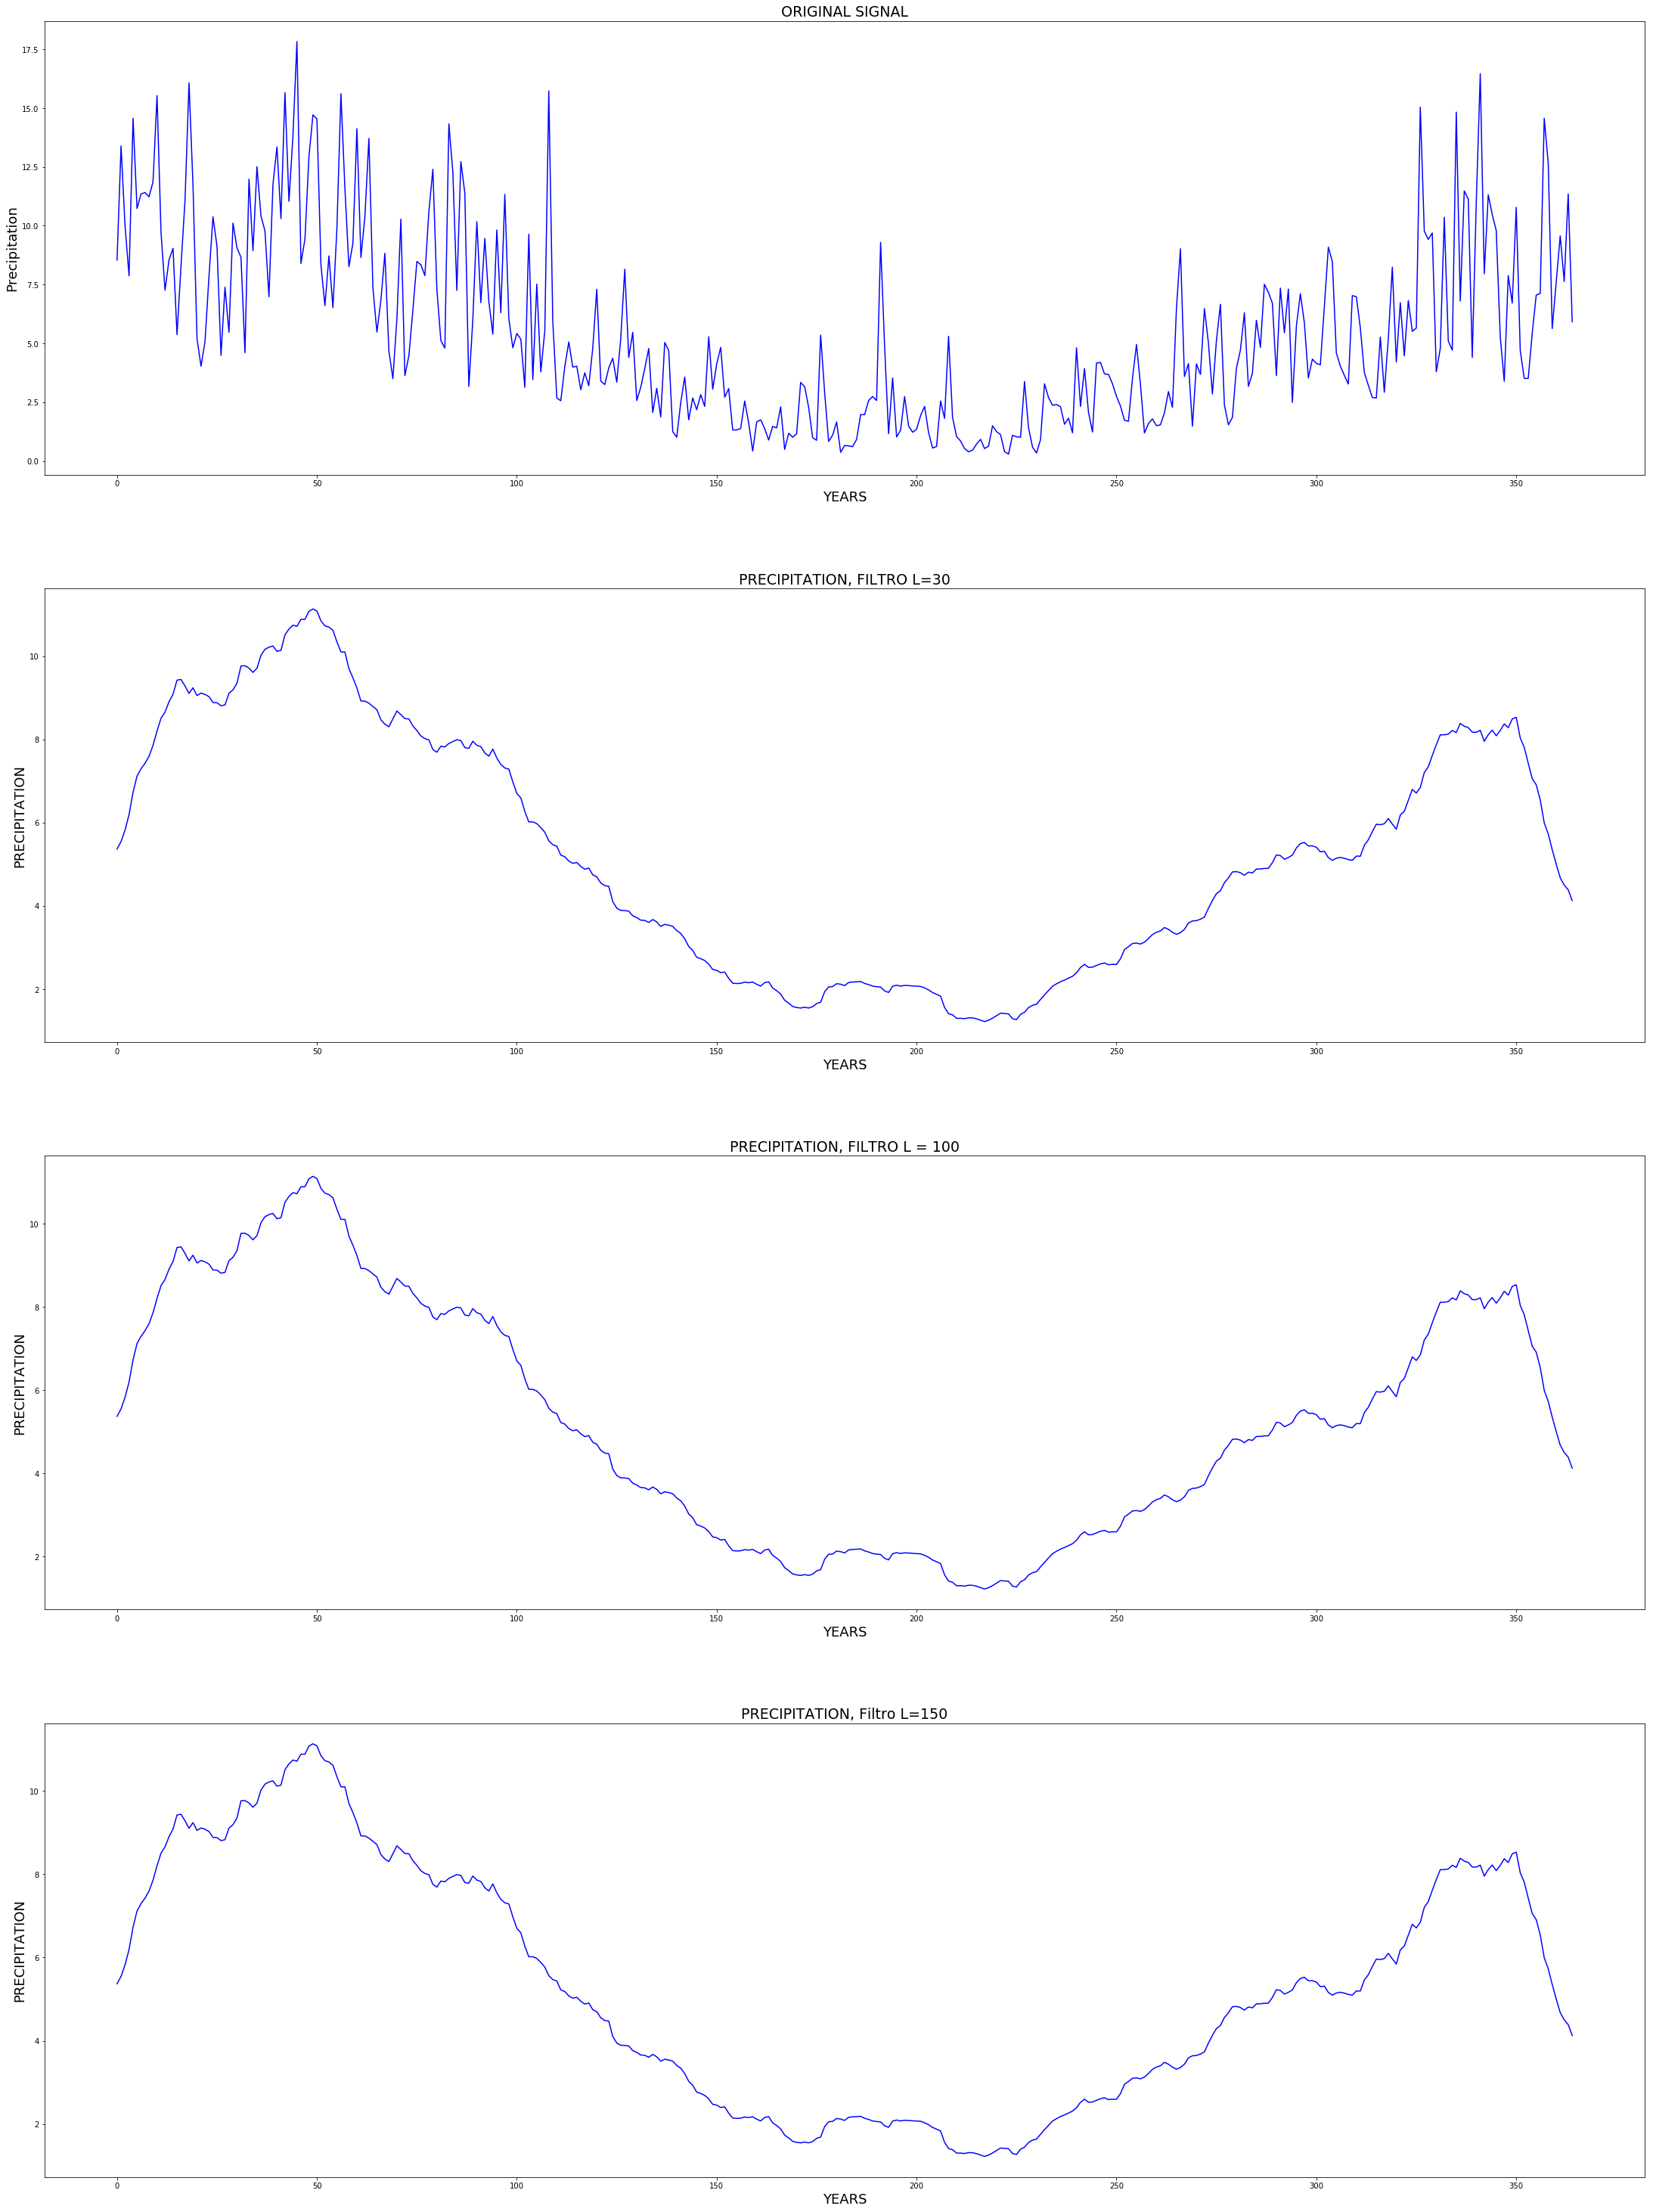

In [24]:
#creamos los filtros para la señal de solo un año

#valores de filtros
L = 30
L_100 = 100
L_150 = 150

#Generamos los coeficientres del filtro
coefs=np.ones(L)/float(L)
coefs_100=np.ones(L_100)/float(L_100)
coefs_150=np.ones(L_150)/float(L_150)

#seleccionamos el año que queremos filtrar y comparar
lluvia1990=precipitation[np.where(years==1990 )]

#salida de convolución L=30, L=100, L=150
senal_smooth_30=np.convolve(lluvia1990, coefs, mode='same')
senal_smooth_100=np.convolve(lluvia1990, coefs, mode='same')
senal_smooth_150=np.convolve(lluvia1990, coefs, mode='same')

#periodo de muestreo de la señal
t = np.arange(0,365,1)

print ("Graficamos la señal del año 1990 para comparar los filtros")

#Graficamos

#señal original
plt.subplot(4,1,1)
plt.plot(t, lluvia1990, 'b')
plt.xlabel('YEARS',fontsize=18)
plt.ylabel('Precipitation',fontsize=18)
plt.title('ORIGINAL SIGNAL', fontsize=19)


#graficamos L = 30
plt.subplot(4,1,2)
plt.plot(t, senal_smooth_30, 'b')
plt.xlabel('YEARS',fontsize=18)
plt.ylabel('PRECIPITATION',fontsize=18)
plt.title('PRECIPITATION, FILTRO L=30', fontsize=19)


#graficamos L = 100
plt.subplot(4,1,3)
plt.plot(t, senal_smooth_100, 'b')
plt.xlabel('YEARS',fontsize=18)
plt.ylabel('PRECIPITATION',fontsize=18)
plt.title('PRECIPITATION, FILTRO L = 100', fontsize=19)


#graficamos L = 150
plt.subplot(4,1,4)
plt.plot(t, senal_smooth_150, 'b')
plt.xlabel('YEARS',fontsize=18)
plt.ylabel('PRECIPITATION',fontsize=18)
plt.title('PRECIPITATION, Filtro L=150', fontsize=19)

plt.subplots_adjust(top=10, bottom=0.1, left=0.10, right=5, hspace=0.25, wspace=0.35)


A medida que aumentamos el filtro notamos que la señal es más suave y esto lo podemos notar más fácilmente en la señal que graficamos de solo un año. Con esta señal más suave nos permite hacer una valoración más cómoda para nosotros, pero podemos estar perdiendo algo de precisión si queremos ser rigurosos, ya que algunos picos son eliminados. 
##### ¿Por qué se debe usar mode='same'?
El método sane nos arroja la longitud máxima y mínima de la señal  y esto hace que los valores en los extremos no se vayan a perder y sean tomados en cuenta para la interpretación.


##### 2. Diseñe y calcule la señal de salida para filtros de un mes (L = 30 para la señal de precipitación y L = 30*24 para la de la calidad del aire), un trimestre (L = 90 y L = 90 * 24, dependiendo a señal) y un año (L = 365 y L = 365 *24, dependiendo la se~nal). Gráque las señales resultantes. ¿Con cual considera que se visualiza y se podría analizar mejor la información?

Para hacer este punto nos apoyamos en el concepto de convolución y los filtros, es decir, para calcular la señal de salida para un filtro de un mes le asignamos a L=30 ya que esa es la cantidad de días que en teoría trabajamos para un mes, para un trimestre le debemos asignar a L=90 lo cual nos representa un trimestre ya que este tiene 90 días, ya con estos dos ejemplos se puede entender que para un año necesitamos que L=366.

Graficamos la señal de todos los años para comparar los filtros


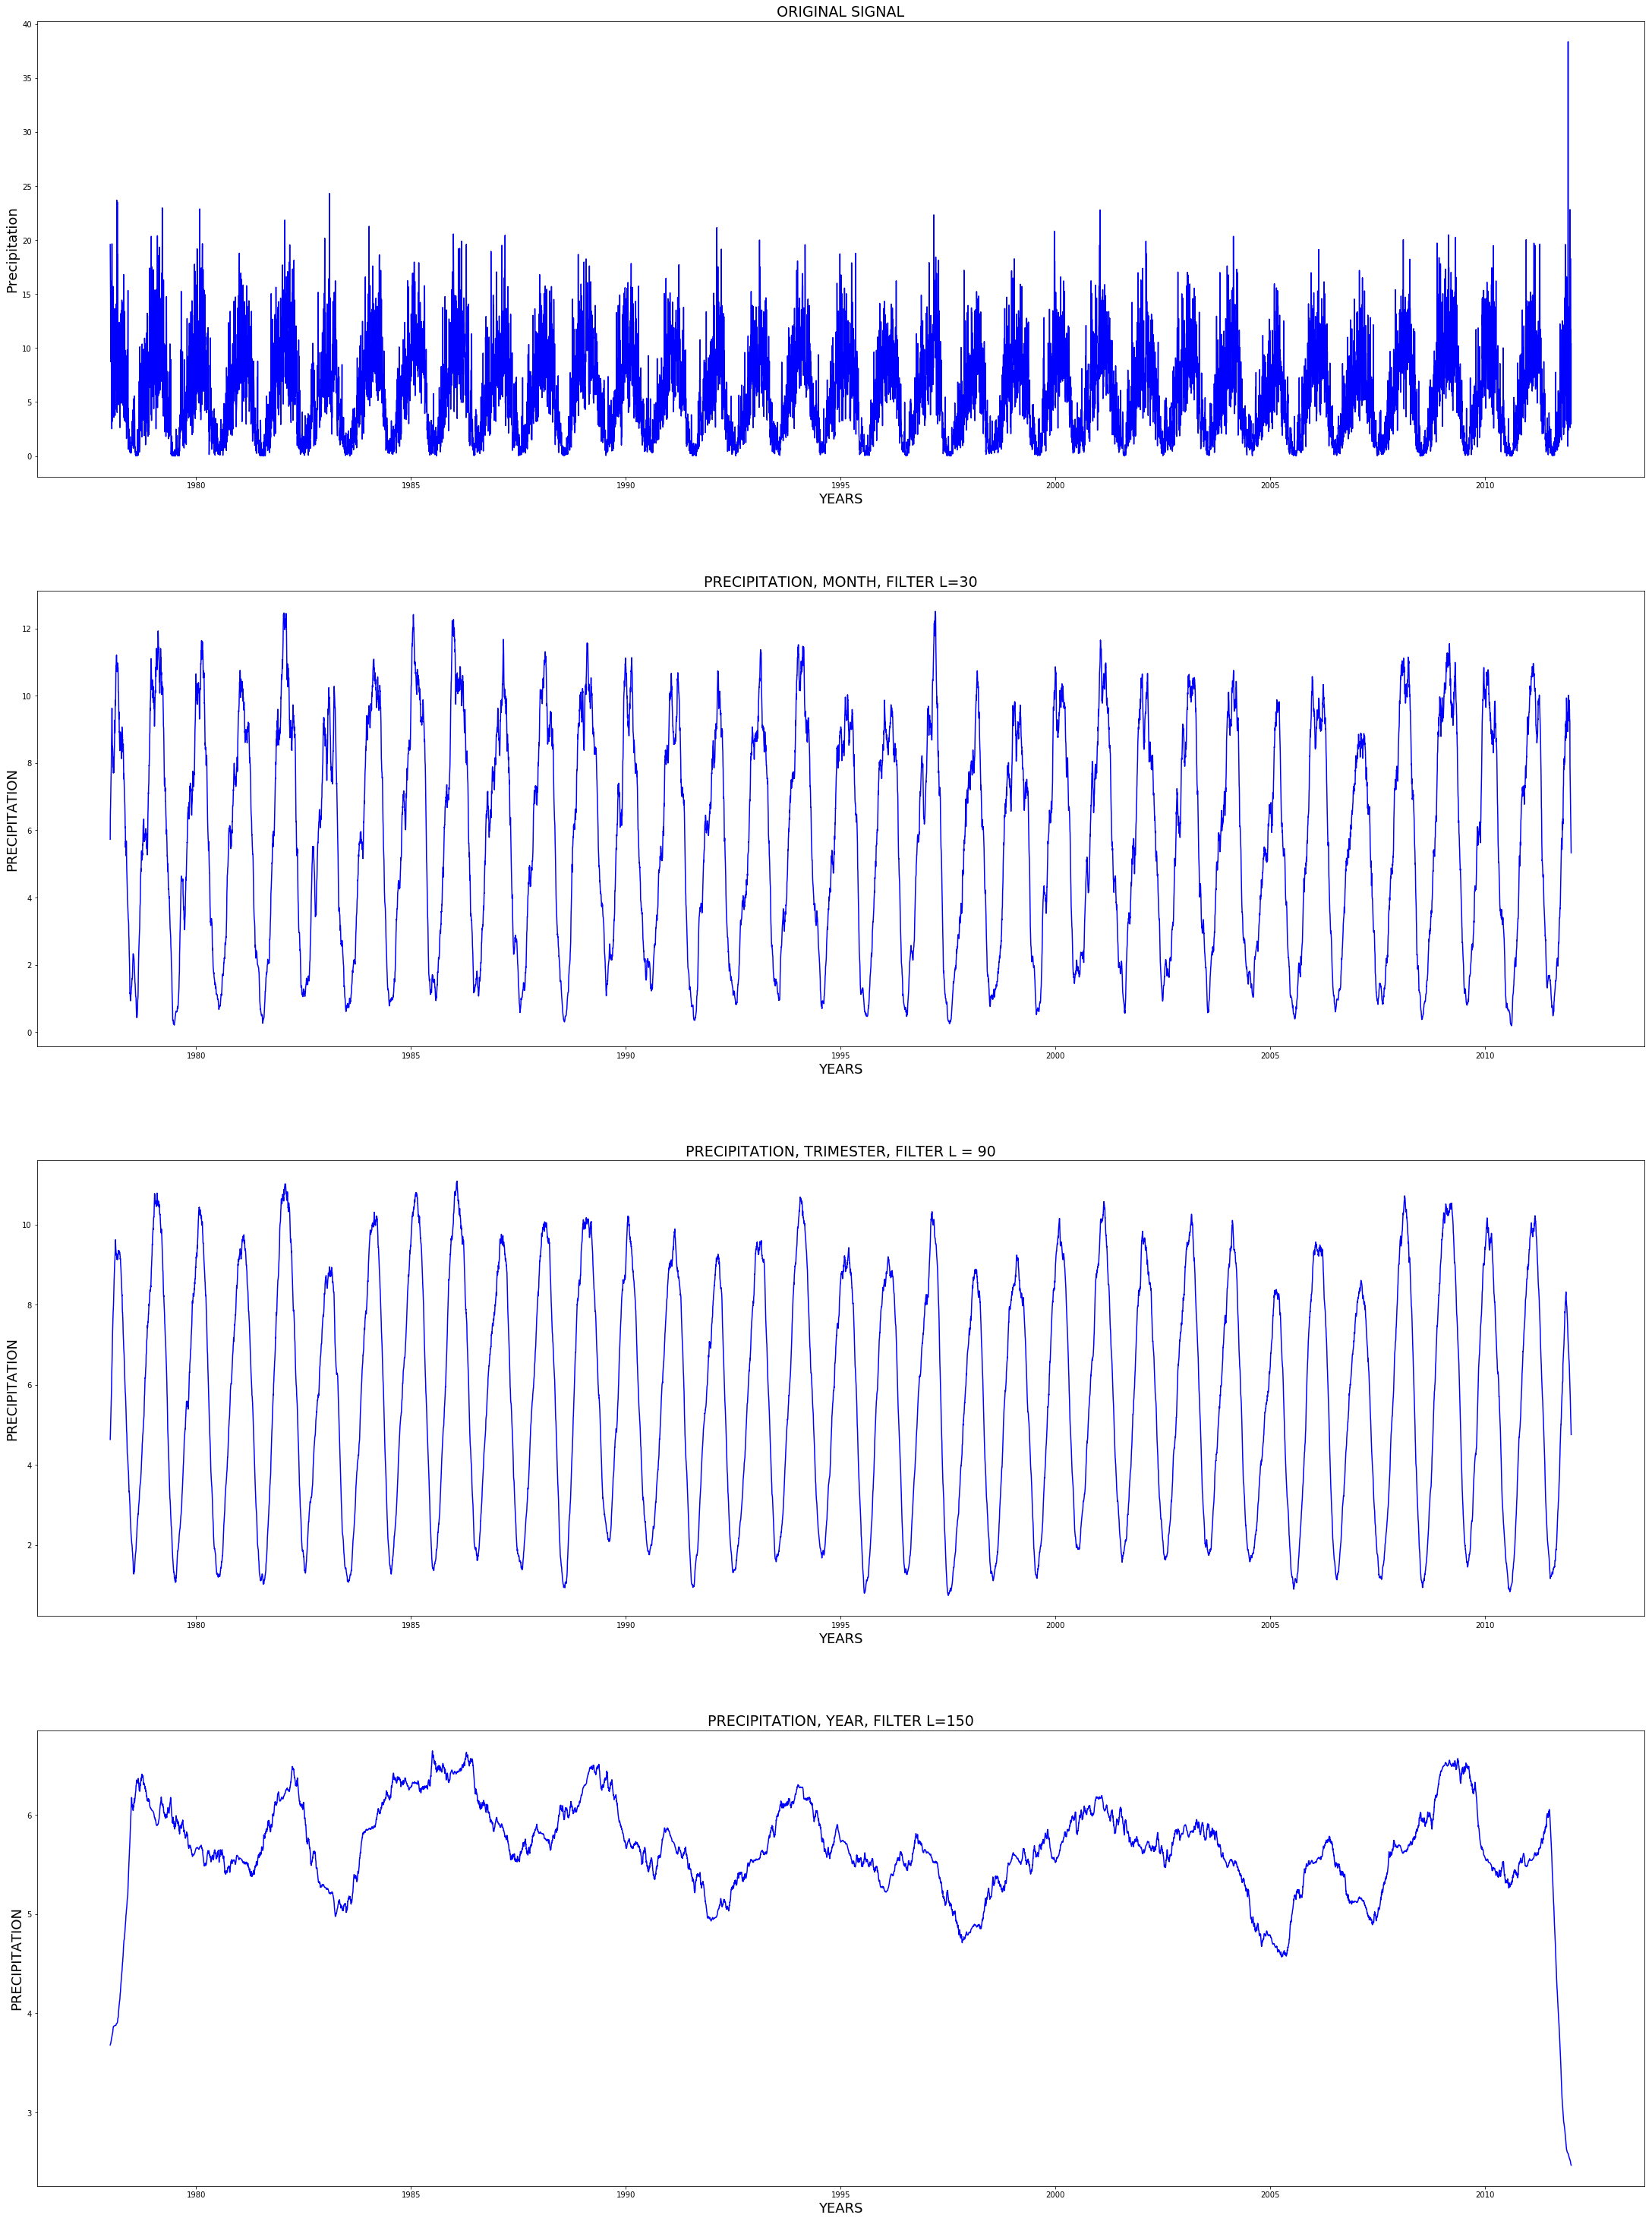

In [32]:
#creamos los filtros para la señal completa

#valores de filtros
L_month = 30
L_trimester = 90
L_year = 365


#Generamos los coeficientres del filtro
coefs=np.ones(L_month)/float(L_month)
coefs_100=np.ones(L_trimester)/float(L_trimester)
coefs_150=np.ones(L_year)/float(L_year)


#salida de convolución L=30, L=100, L=150
senal_smooth=np.convolve(precipitation, coefs, mode='same')
senal_smooth_100=np.convolve(precipitation, coefs_100, mode='same')
senal_smooth_150=np.convolve(precipitation, coefs_150, mode='same')


#Para representar el denominador, el numerador y la respuesta natural
num=np.zeros(L)
num[0]=1.0/L
num[-1]=-1.0/L
den=np.zeros(L)
den[0]=1
den[1]=-1


#periodo de muestreo de la señal
Ts = 1/365  
#para la senal de precipitacion, vector de tiempo
t=np.arange(1978, 2012, Ts) 


print ("Graficamos la señal de todos los años para comparar los filtros")


#Graficamos

#señal original
plt.subplot(4,1,1)
plt.plot(t, precipitation, 'b')
plt.xlabel('YEARS',fontsize=18)
plt.ylabel('Precipitation',fontsize=18)
plt.title('ORIGINAL SIGNAL', fontsize=19)


#graficamos L = 30
plt.subplot(4,1,2)
plt.plot(t, senal_smooth, 'b')
plt.xlabel('YEARS',fontsize=18)
plt.ylabel('PRECIPITATION',fontsize=18)
plt.title('PRECIPITATION, MONTH, FILTER L=30', fontsize=19)


#graficamos L = 100
plt.subplot(4,1,3)
plt.plot(t, senal_smooth_100, 'b')
plt.xlabel('YEARS',fontsize=18)
plt.ylabel('PRECIPITATION',fontsize=18)
plt.title('PRECIPITATION, TRIMESTER, FILTER L = 90', fontsize=19)


#graficamos L = 150
plt.subplot(4,1,4)
plt.plot(t, senal_smooth_150, 'b')
plt.xlabel('YEARS',fontsize=18)
plt.ylabel('PRECIPITATION',fontsize=18)
plt.title('PRECIPITATION, YEAR, FILTER L=150', fontsize=19)

plt.subplots_adjust(top=10, bottom=0.1, left=0.10, right=5, hspace=0.25, wspace=0.35)


#####  ¿Con cuál considera que se visualiza y se podría analizar mejor la información?
Considero que eso va a depender de que tan precisos o generales queremos ser a la hora de hacer la valoración. Si no buscamos tanta precisión en el análisis, la señal de filtro de un trimestre muestra una señal bastante suave que nos permite obtener unos buenos datos y con una buena valoración. Si ya queremos ser un poco más precisos en la valoración debemos visualizar el filtro del mes.  


Importamos las funciones del archivo ztrans.py las cuales calculan la respuesta en frecuencia, respuesta al escalón, y al impulso . 

In [27]:
from ztrans import *

##### 3.  Utilice la función mfreqz para graficar y analizar la respuesta al impulso y al escalón del filtro de media móvil. ¿Qué me indica la respuestaal impulso? Hágalo para L= 7 y L= 30. 

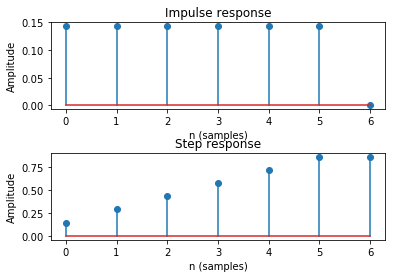

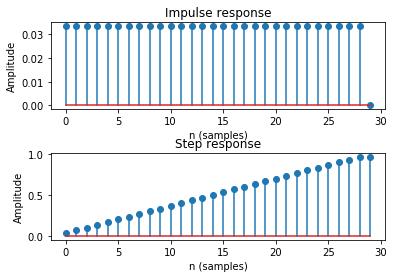

In [28]:

L=7
num=np.zeros(L)
num[0]=1.0/L
num[-1]=-1.0/L
den=np.zeros(L)
den[0]=1
den[1]=-1
impz(num,den)

L=30
num=np.zeros(L)
num[0]=1.0/L
num[-1]=-1.0/L
den=np.zeros(L)
den[0]=1
den[1]=-1
impz(num,den)


##### ¿Qué me indica la respuesta al impulso? 
La respuesta al impulso me indica que dependiendo la cantidad de puntos usados (L) se ve afectada la amplitud del impulso; A menor número de puntos, mayor es la amplitud del impulso, y a mayor número de puntos, la amplitud del impulso es menor. En ambos casos la amplitud es constante.


##### 4.  Utilice la función mfreqz para graficar y analizar la respuesta en frecuencia del filtro de media m ́ovil. ¿Qué tipo de filtro es? ¿Cómo es su respuesta en fase? Compare los resultados con L= 7 y L= 30. 

C:\Users\usuario\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:346: RuntimeWarning: invalid value encountered in true_divide
  h = polyval(b[::-1], zm1) / polyval(a[::-1], zm1)


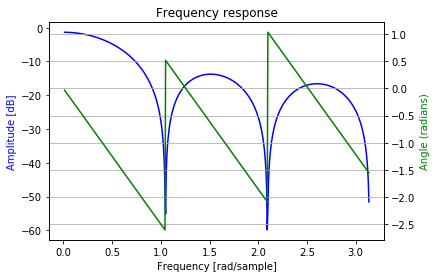

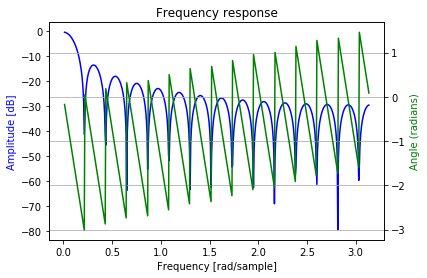

In [29]:

L=7
num=np.zeros(L)
num[0]=1.0/L
num[-1]=-1.0/L
den=np.zeros(L)
den[0]=1
den[1]=-1
mfreqz(num,den)

L=30
num=np.zeros(L)
num[0]=1.0/L
num[-1]=-1.0/L
den=np.zeros(L)
den[0]=1
den[1]=-1
mfreqz(num,den)

##### ¿Cómo es su respuesta en fase?
A medida que aumenta la frecuencia la fase va aumentando tanto para L=7 como para L=30, sin embargo, hay cambios tanto en los valores máximos y mínimos de la fase, para L=7 el valor negativo en radianes es mayor (llega a -3), mientas que cuando L=30 el mínimo valor es más o menos -2.6. El aumento de fase es mayor en L=7. para el L mayor se tiene más ceros y están en una mayor distribución en el círculo unitario, con la ubicación de estos puedo saber cómo es el comportamiento dinámico del sistema.
A mayor es L, se agrega un mayor desface. 

## 3. Filtro de primera diferencia

In [37]:
#Generamos los coeficiente para el filtro
difcoefs=[1, -1]

#función de transferencia
num=[1, -1]
den=[1, 0]


##### 1.  Mediante la función de convolución utilizada anteriormente, calcule la derivada de la señal con el filtro de primera diferencia, grafique y analice brevemente la señal resultante. ¿Qué me indica esta señal?

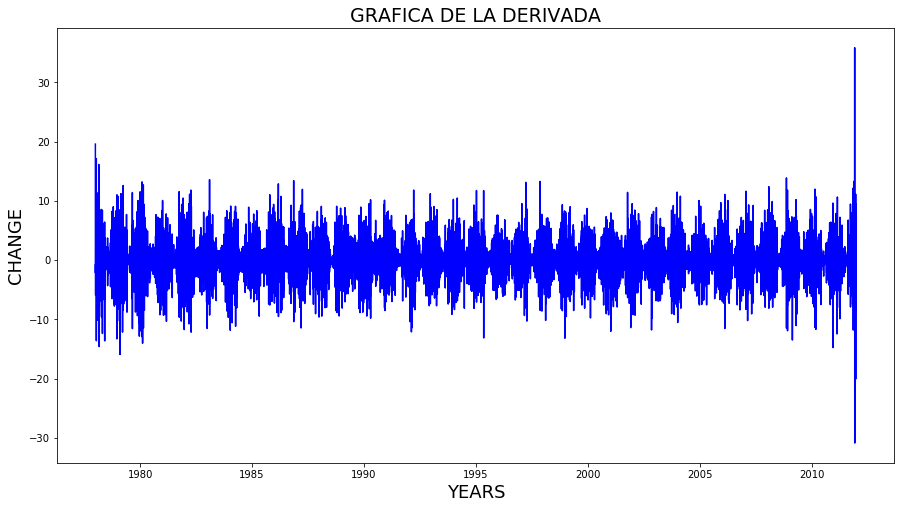

In [35]:
#salida de convolución 
senal_smooth=np.convolve(precipitation, difcoefs, mode='same')

#graficamos
plt.figure(figsize=(15,8))
plt.plot(t, senal_smooth, 'b')
plt.xlabel('YEARS',fontsize=18)
plt.ylabel('CHANGE',fontsize=18)
plt.title('GRAFICA DE LA DERIVADA', fontsize=19)
plt.show()

Nuestra señal tiene una tasa de cambio muy fluctuante, es decir, que las muestras de precipitación que tenemos están variando mucho.

##### 2.  Utilice  la  función impz para  graficar  y  analizar  la  respuesta  al  impulso  y  al  escalón  del  filtro  de  primera diferencia. ¿Qué me indica la respuesta al impulso?

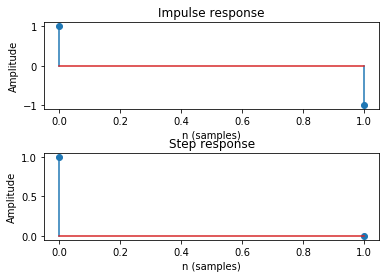

In [38]:
impz(num,den)

##### 3.  Utilice la función mfreqz para graficar y analizar la respuesta en frecuencia del filtro de primera diferencia. ¿Qué tipo de filtro es? ¿Cómo es la respuesta de fase?  

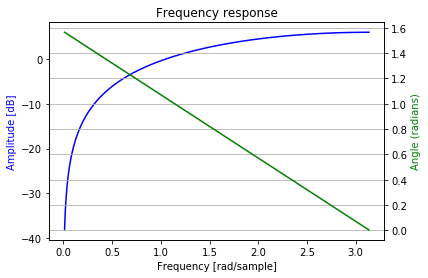

In [39]:
mfreqz(num,den)

El tipo de filtro es pasa altas. La fase tiene una disminución lineal muy rápida, cuando la frecuencia pasa los 3 rad/muestra la fase se hace cero. 

CONCLUSIONES 

* Debemos tener cuidado con el periodo de muestreo, ya que es fundamental para poder hacer una buena representación de nuestra señal.

* En el filtro de medio móvil tomamos una cierta cantidad de putos (L) y calculamos su media. Tenemos como resultado una señal suavizada que elimina parte del ruido de alta frecuencia. La cantidad de puntos tiene una gran influencia en el comportamiento del filtro. 

* El filtro de media móvil es poco estable en la aparición de puntos muy alejados ya que quita esas anomalías. 

* El tamaño de “L” condiciona el comportamiento del filtro; cuanto mayor sea el tamaño, más grande será el suavizado de la señal. 

* Aumentar el tamaño de la ventana tiene consecuencias negativas, como eliminar componentes de la señal en la cual tenemos interés, introduce un desfase entre la señal original y la señal filtrada. 
